In [530]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
import scipy.signal as sig
from scipy.fftpack import fft, ifft
from IPython.display import Audio
np.set_printoptions(precision=3, suppress=True)

import the library needed. 

In [531]:
Fs, i = wavfile.read('i.wav') # i sound
Audio(i, rate=Fs)

D:\Anaconda\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


I did the 'i' sounds and use Audacity software and change it to single channel with 8000Hz.

In [532]:
i.shape

(5704,)

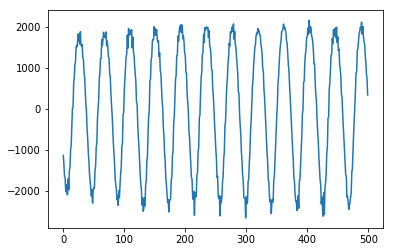

In [533]:
plt.plot(i[500:1000]);

Throw away the first few points and set the range to [500:1000] which we can see it's periodic. 

In [534]:
i.size

5704

The sound has 5704 samples.

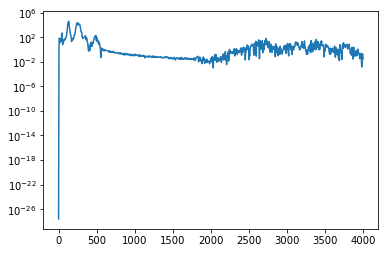

In [535]:
x = i[2500:4000]
N = len(x)
f, Pxx = sig.periodogram(x, fs=8000)
plt.semilogy(f,Pxx);

I choose range [2500:4000] but there always exist a straight line at the beginning. And here we can see that the hightest energy located on the second and third harmonics.

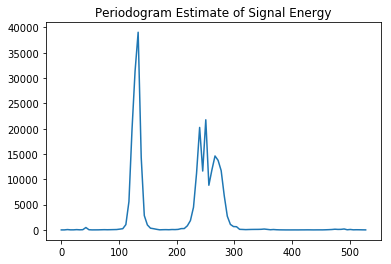

In [536]:
plt.plot(f[:100],Pxx[:100])
plt.title('Periodogram Estimate of Signal Energy');

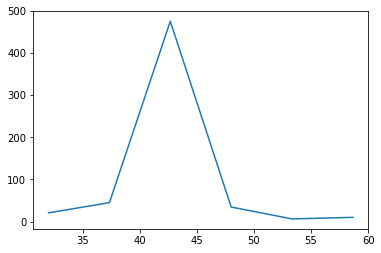

In [537]:
plt.plot(f[6:12], Pxx[6:12]); #fundamental = 43 HZ

According to these two plot can we figure out that the fundamental is about 43Hz. 

In [538]:
8000/43 #length per period

186.04651162790697

Then we can calculate the length per period which is 186 samples per period.

In [539]:
peaks = sig.find_peaks_cwt(x,range(28,34))
peaks[:8],np.diff(peaks[:9])

(array([ 113,  285,  465,  650,  840, 1039, 1241, 1381], dtype=int64),
 array([172, 180, 185, 190, 199, 202, 140,  71], dtype=int64))

By finding the range of the function sig.find_peaks_cwt can we see that the peaks are around 186 which is the same as the samples we have.

In [549]:
np.bincount(np.diff(peaks))[184:]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

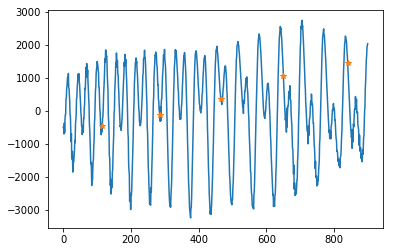

In [550]:
plt.plot(x[0:900])
plt.plot(peaks[:5],x[peaks[:5]],'*');

We can see that the 'peaks' which are represented by stars are located in the middle of the signal.

In [542]:
def fourier_coeffs(x, K=1):
    """x = array with 1 period of signal
       K = number of Fourier coeffs
       periods = number of periods in input returns
       aks = cosine coeffs
       bks = sine coeffs"""
    omega = np.linspace(0,2*np.pi,len(x))
    aks, bks = [np.average(x)], [0] # k=0 value
    for k in range(1,K):
        ck,sk = np.cos(omega*k), np.sin(omega*k)
        aks.append(2*np.average(x*ck))
        bks.append(2*np.average(x*sk))
    return np.array(aks), np.array(bks)    

This is the fourier series coefficients function.

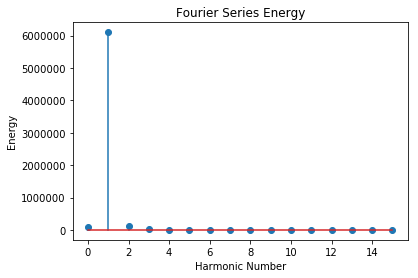

In [543]:
L,start = 42, 420
sample = x[start:start+L]
aks, bks = fourier_coeffs(sample,K=16)
plt.title('Fourier Series Energy')
plt.xlabel('Harmonic Number')
plt.ylabel('Energy')
plt.stem(aks**2 + bks**2);

The plot shows the energy of each fourier component. As it shows that the second harmonics has the highest energy. And this plot should be similar to the periodogram.

In [544]:
def fourier_approx(aks, bks, nmax, periods=1):
    n = np.linspace(0,periods*2*np.pi,nmax)
    xhat = np.zeros(nmax)
    for k,(ak,bk) in enumerate(zip(aks,bks)):
        xhat += ak*np.cos(k*n) + bk*np.sin(k*n)
    return xhat

This is the fourier series approximation function.

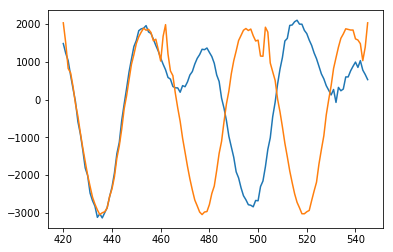

In [545]:
xhat = fourier_approx(aks, bks, 3*42, 3)
n = np.arange(start,start+3*42)
plt.plot(n,x[start:start+3*42])
plt.plot(n,xhat);

The first period can generate the fourier series coefficients. 

In [546]:
xhat = fourier_approx(aks,bks,100*42,100)
xhat += 1500*np.random.rand(len(xhat))
Audio(xhat,rate=Fs)

Add some noise in the sound by generate approximation. 